## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df=pd.read_csv("opsd_germany_daily.csv")
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [5]:
df1 = pd.DataFrame(df)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
type(df1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

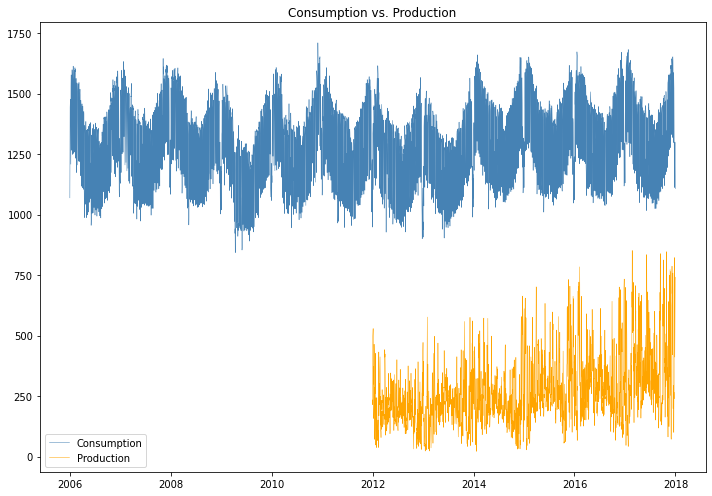

In [6]:
plt.figure(figsize=(10, 7))  # Set the figure size (width, height)

# Plot consumption
plt.plot(df['Date'], df['Consumption'], label='Consumption', color='SteelBlue', linewidth=0.5)

# Plot production (wind + solar)
plt.plot(df['Date'], df['Wind+Solar'], label='Production', color='orange', linewidth=0.5)

# Set plot title and labels
plt.title('Consumption vs. Production')

# Display legend
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

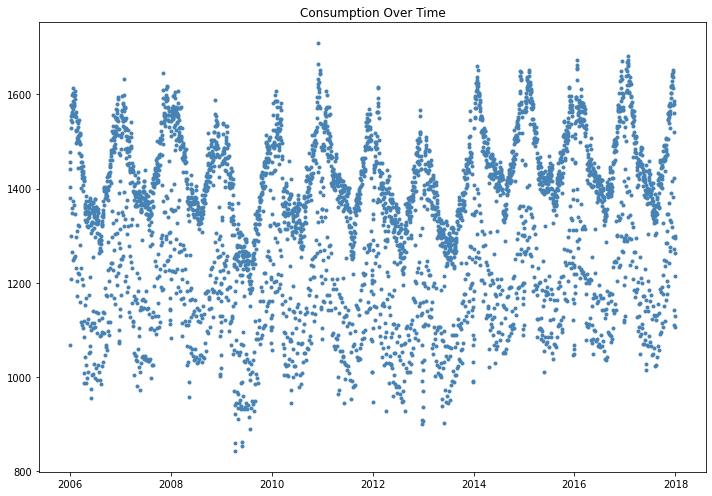

In [7]:
plt.figure(figsize=(10,7))

plt.plot(df['Date'], df['Consumption'], color='SteelBlue', linewidth=0, marker='o',markersize=3)

# Set plot title and labels
plt.title('Consumption Over Time')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

And plot the production over time :

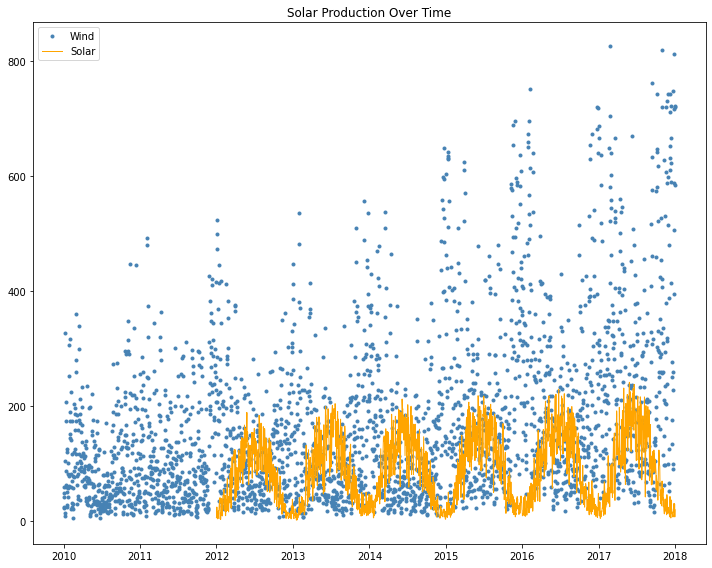

In [8]:
plt.figure(figsize=(10,8))
# Plot for wind production
plt.plot(df['Date'], df['Wind'], label='Wind', color='SteelBlue', linewidth=0, marker='o', markersize=3)

# Plot for solar production
plt.plot(df['Date'], df['Solar'], label='Solar', color='orange', linewidth=1)

# Set plot title and labels
plt.title('Solar Production Over Time')
plt.legend()  # Display legend

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

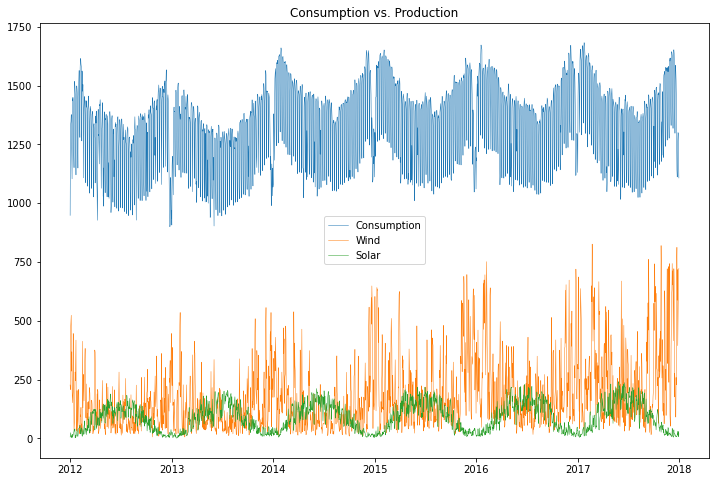

In [14]:
plt.figure(figsize=(12,8))
...
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

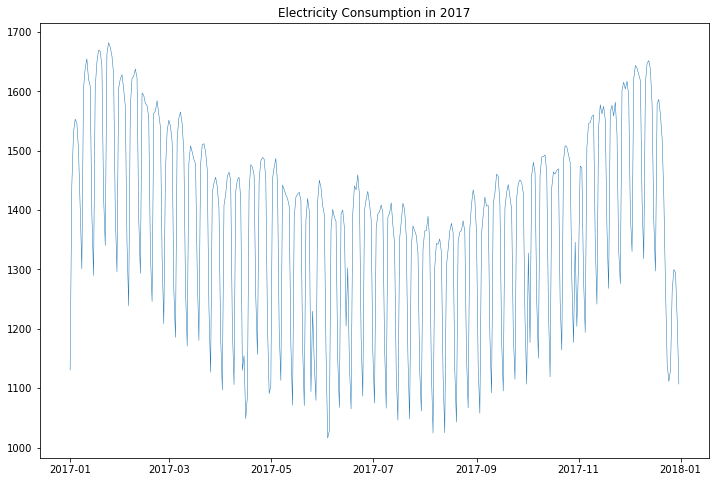

In [15]:
# Plot over the year
plt.figure(figsize=(12,8))
...
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

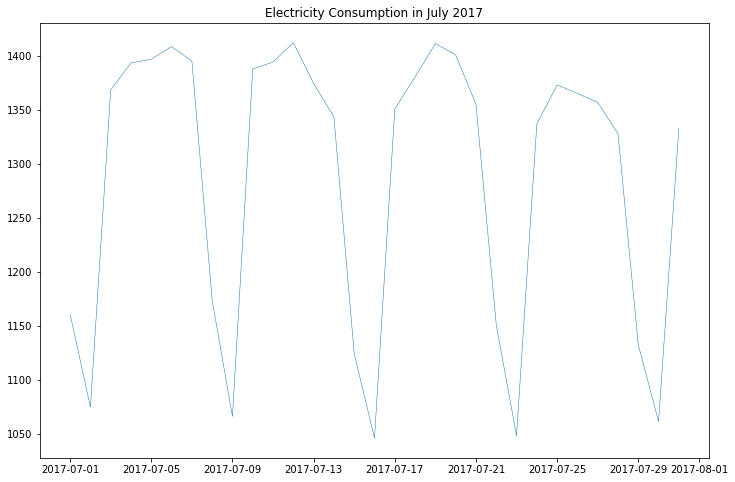

In [16]:
# Plot over a month
plt.figure(figsize=(12,8))
...
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

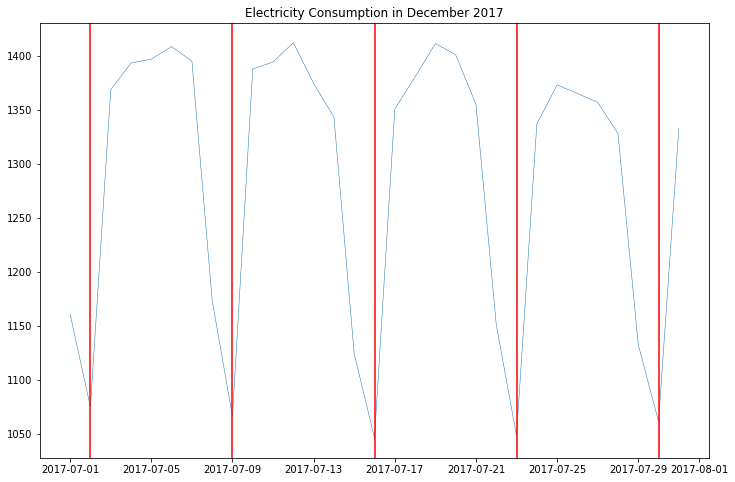

In [22]:
# Plot on Sundays
plt.figure(figsize=(12,8))
...
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [25]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = ...
df_2['month'] = ...
years = df_2['year'].unique()
print(years)
df_2.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


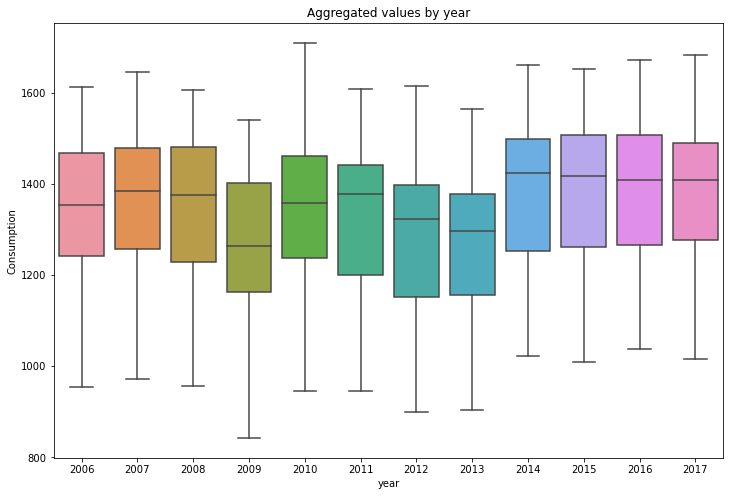

In [26]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
...
plt.show()

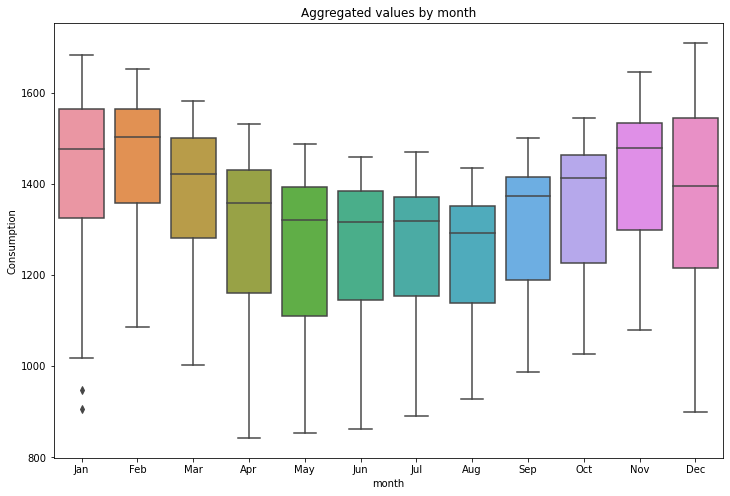

In [27]:
# Boxplot month
plt.figure(figsize=(12,8))
...
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

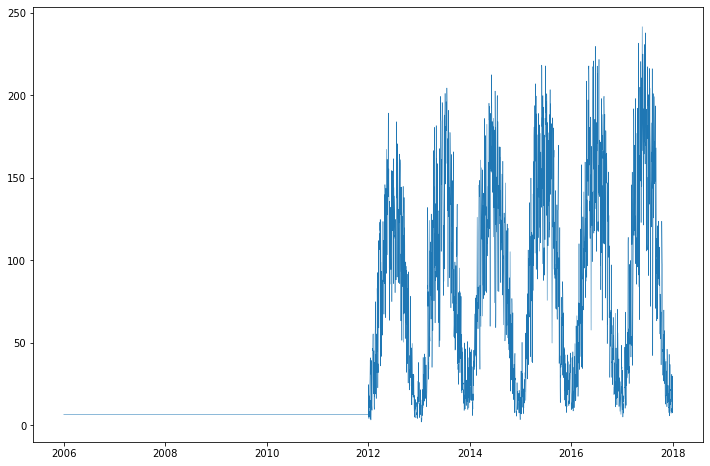

In [28]:
# Plot Solar
plt.figure(figsize=(12,8))
...
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [29]:
# Correlation between consumption and overall production
...

0.02764784385924093

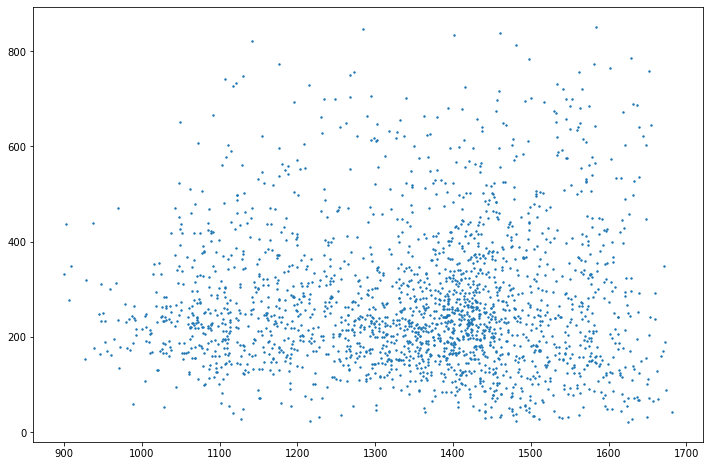

In [30]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

In [31]:
# Correlation between solar production and wind production
...

-0.3088318295977341

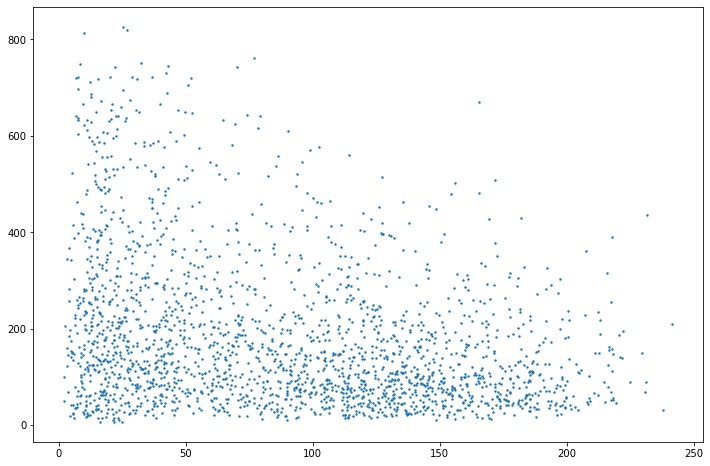

In [32]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

In [33]:
# Correlation between consumption and wind production
...

0.13518640075918514

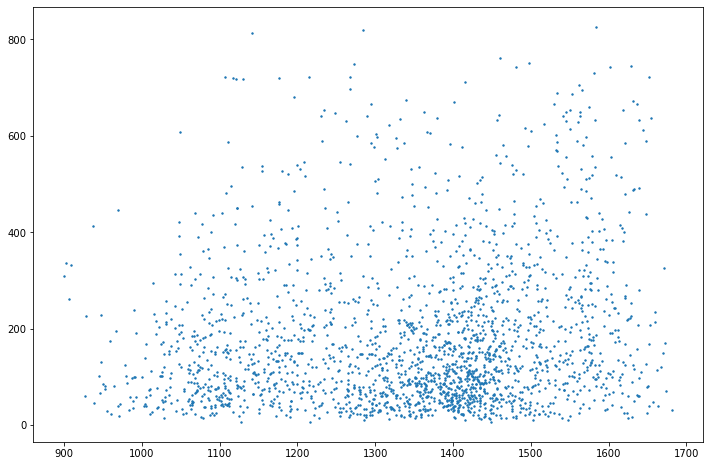

In [34]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()

In [35]:
# Correlation between consumption and solar production
...

-0.2789426551991438

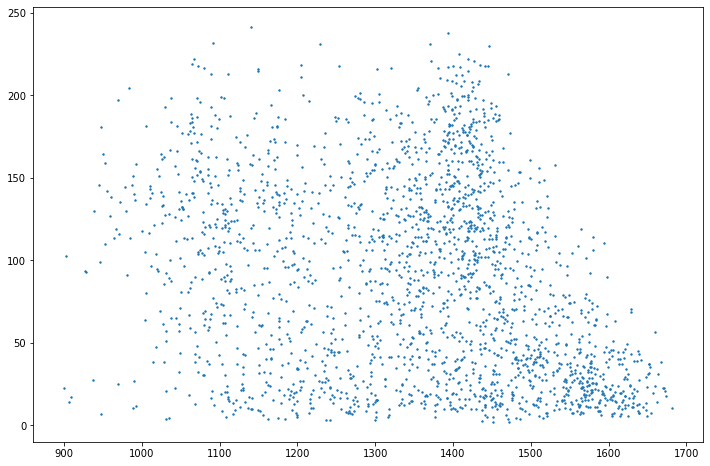

In [38]:
# Plot
plt.figure(figsize=(12,8))
...
plt.show()